In [1]:
import tools as tools
import numpy as np
from itertools import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
sns.set_style('dark', {'axes.grid':True, 'axes.edgecolor':'black', 'font.family':['serif'],'font.serif':['Roman'],
                       'xtixks.bottom':True, 'ytick.left':True})

# PART A

In [33]:
varVals = np.load('parta_TransVar.npz')
print(varVals.files)


['trans_variance']


In [34]:
var = varVals['trans_variance']
varSteps = np.arange(0, var.shape[0])*100
analytical = np.ones(var.shape[0])

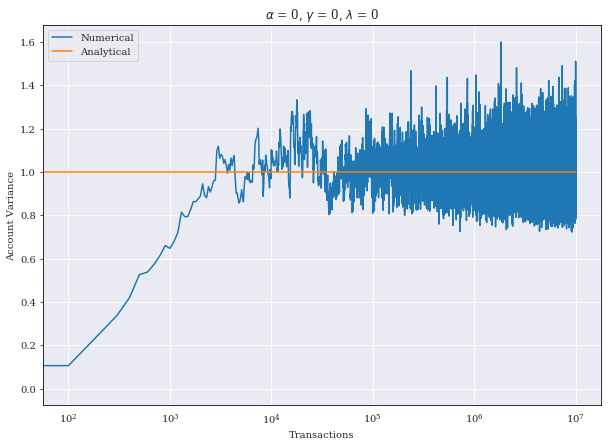

In [64]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogx(varSteps, var, label = 'Numerical')
ax.semilogx(varSteps, analytical, label = 'Analytical')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')

plt.show()

LOOKS LIKE 10^5 GIVES BEST RESULTS

In [84]:
binVals = np.load('parta_BinVals.npz')
binParams = np.load('parta_BinParams.npz')
print(binVals.files)
print(binParams.files)

['final_dist', 'error_vals', 'all_vals']
['binSize', 'binMax', 'binNumber', 'binSteps']


In [85]:
mc_steps = 1e4
agents = 500
m0 = 1000
binSize = binParams['binSize']
binCounts = binVals['final_dist']
errorVec = binVals['error_vals']
binX = binParams['binSteps']/m0
errorX = np.arange(0, mc_steps)
plotBins = binCounts/mc_steps/agents*m0/binSize

In [86]:
# finding analytical vals
from scipy.special import gamma
lam = 0
apl = 0
gam = 0

n = 1 + 3.0*lam/(1 - lam)
a = n**n / gamma(n)
analytic = a*binX**(n-1)*np.exp(-n*binX)

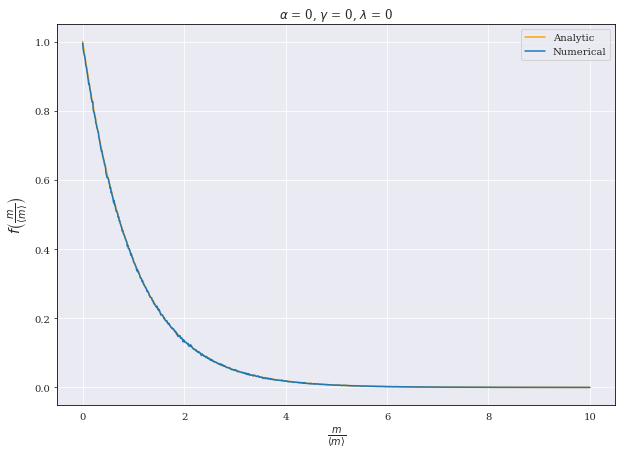

In [87]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(binX, analytic, label = 'Analytic', color = 'orange')
ax.plot(binX, plotBins, label = 'Numerical', c='C0')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()


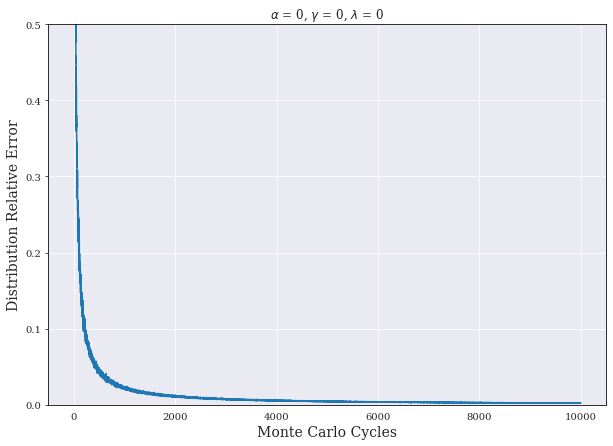

In [72]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(errorX[:-1], errorVec)
ax.set_ylim(0,.5)
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel('Monte Carlo Cycles', fontsize = 14)
ax.set_ylabel('Distribution Relative Error', fontsize = 14)

plt.show()

# PART B

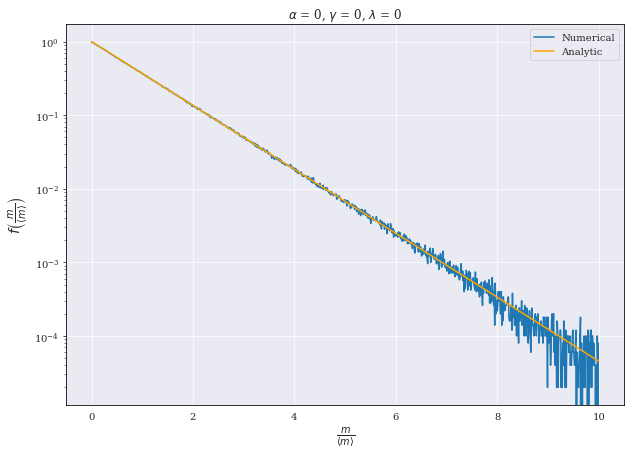

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
ax.semilogy(binX, plotBins, label = 'Numerical', c='C0')
ax.semilogy(binX, analytic, label = 'Analytic', color = 'orange')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()

# PART C

Check variances to see when we have enough transactions

In [41]:
var25 = np.load('partc_25_TransVar.npz')
var5 = np.load('partc_5_TransVar.npz')
var9 = np.load('partc_9_TransVar.npz')
var25vec = var25['trans_variance']
var5vec = var5['trans_variance']
var9vec = var9['trans_variance']


In [43]:
var25analytic = np.ones(var25vec.shape[0])*((1+3.0*0.25/(1-0.25))**(-1))
var5analytic = np.ones(var5vec.shape[0])*((1+3.0*0.5/(1-0.5))**(-1))
var9analytic = np.ones(var9vec.shape[0])*((1+3.0*0.9/(1-0.9))**(-1))
varSteps = np.arange(0, var25vec.shape[0])*100


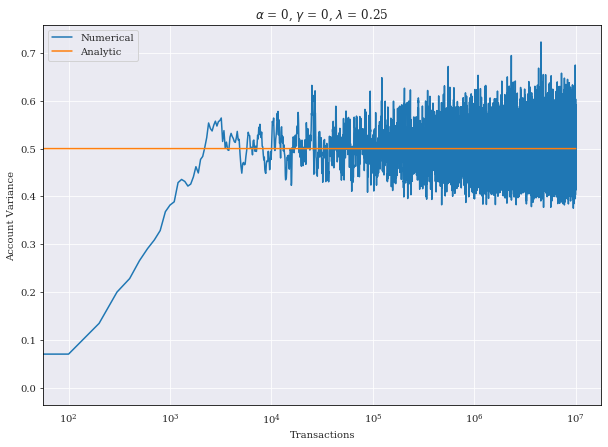

In [48]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogx(varSteps, var25vec, label = 'Numerical')
ax.semilogx(varSteps, var25analytic, label = 'Analytic')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0.25')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')
plt.show()

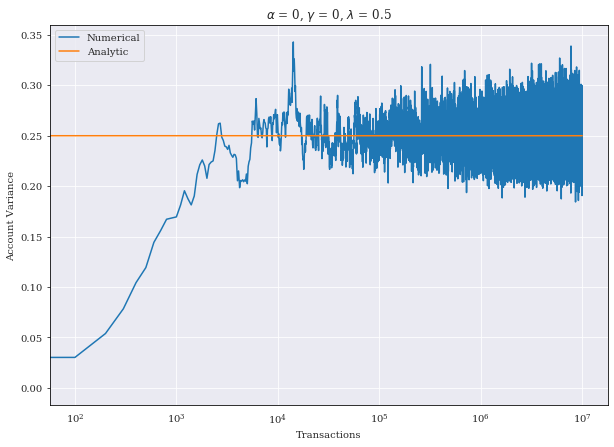

In [49]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogx(varSteps, var5vec, label = 'Numerical')
ax.semilogx(varSteps, var5analytic, label = 'Analytic')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0.5')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')
plt.show()

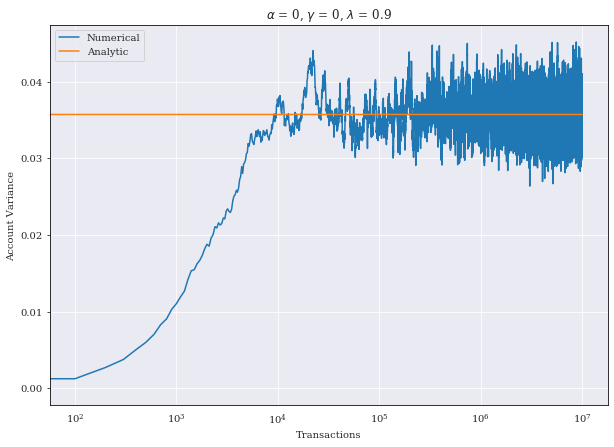

In [50]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogx(varSteps, var9vec, label = 'Numerical')
ax.semilogx(varSteps, var9analytic, label = 'Analytic')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0.9')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')
plt.show()

AGAIN 10^5 SHOULD BE GOOD

In [77]:
binVals9 = np.load('partc_9_BinVals.npz')
binParams9 = np.load('partc_9_BinParams.npz')
binVals5 = np.load('partc_5_BinVals.npz')
binParams5 = np.load('partc_5_BinParams.npz')
binVals25 = np.load('partc_25_BinVals.npz')
binParams25 = np.load('partc_25_BinParams.npz')
print(binVals.files)
print(binParams.files)

['final_dist', 'error_vals', 'all_vals']
['binSize', 'binMax', 'binNumber', 'binSteps']


In [78]:
mc_steps = 1e4
agents = 500
m0 = 1000
binSize = binParams9['binSize']
binX = binParams['binSteps']/m0

binCounts9 = binVals9['final_dist']
errorVec9 = binVals9['error_vals']
errorX9 = np.arange(0, mc_steps)
binCounts5 = binVals5['final_dist']
binCounts25 = binVals25['final_dist']


plotBins9 = binCounts9/mc_steps/agents*m0/binSize
plotBins5 = binCounts5/mc_steps/agents*m0/binSize
plotBins25 = binCounts25/mc_steps/agents*m0/binSize

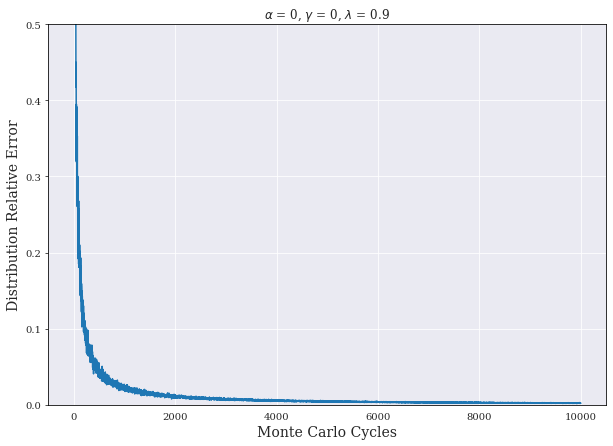

In [79]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(errorX9[:-1], errorVec9)
ax.set_ylim(0,.5)
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0, $\lambda$ = 0.9')
ax.set_xlabel('Monte Carlo Cycles', fontsize = 14)
ax.set_ylabel('Distribution Relative Error', fontsize = 14)

plt.show()

ERROR FOR LAMBDA = 0.9. LOOKS LIKE IT CONVERGES WELL

In [80]:
# finding analytical vals
from scipy.special import gamma
lam = 0.9
apl = 0
gam = 0

n = 1 + 3.0*lam/(1 - lam)
a = n**n / gamma(n)
analytic9 = a*binX**(n-1)*np.exp(-n*binX)

In [81]:
lam = 0.5
apl = 0
gam = 0

n = 1 + 3.0*lam/(1 - lam)
a = n**n / gamma(n)
analytic5 = a*binX**(n-1)*np.exp(-n*binX)

In [82]:
lam = 0.25
apl = 0
gam = 0

n = 1 + 3.0*lam/(1 - lam)
a = n**n / gamma(n)
analytic25 = a*binX**(n-1)*np.exp(-n*binX)

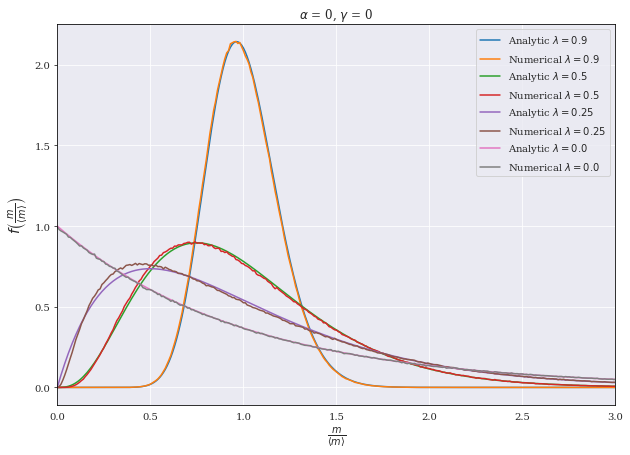

In [90]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(binX, analytic9, label = r'Analytic $\lambda = 0.9$')
ax.plot(binX, plotBins9, label = r'Numerical $\lambda = 0.9$')
ax.plot(binX, analytic5, label = r'Analytic $\lambda = 0.5$')
ax.plot(binX, plotBins5, label = r'Numerical $\lambda = 0.5$')
ax.plot(binX, analytic25, label = r'Analytic $\lambda = 0.25$')
ax.plot(binX, plotBins25, label = r'Numerical $\lambda = 0.25$')
ax.plot(binX, analytic, label = r'Analytic $\lambda = 0.0$')
ax.plot(binX, plotBins, label = r'Numerical $\lambda = 0.0$')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.set_xlim(0,3)
ax.legend(loc = 'upper right')
plt.show()

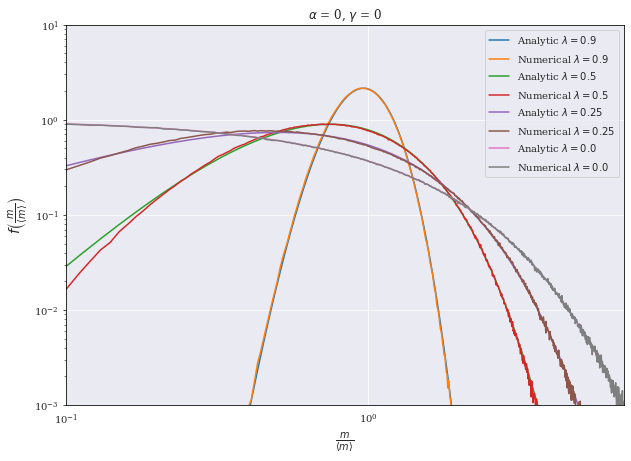

In [106]:
fig, ax = plt.subplots(figsize=(10,7))
ax.loglog(binX, analytic9, label = r'Analytic $\lambda = 0.9$')
ax.loglog(binX, plotBins9, label = r'Numerical $\lambda = 0.9$')
ax.loglog(binX, analytic5, label = r'Analytic $\lambda = 0.5$')
ax.loglog(binX, plotBins5, label = r'Numerical $\lambda = 0.5$')
ax.loglog(binX, analytic25, label = r'Analytic $\lambda = 0.25$')
ax.loglog(binX, plotBins25, label = r'Numerical $\lambda = 0.25$')
ax.loglog(binX, analytic, label = r'Analytic $\lambda = 0.0$')
ax.loglog(binX, plotBins, label = r'Numerical $\lambda = 0.0$')
ax.set_title(r'$\alpha$ = 0, $\gamma$ = 0')
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
ax.set_xlim(1*1e-1,7*1e0)
ax.set_ylim(1e-3, 1e1)
plt.show()

In [108]:
print(binX.shape)

(1000,)


TAIL BEHAVIOR

In [131]:
from scipy.optimize import curve_fit

def powerlaw( x, a, b):
    return a*x**(1-b)

popt9, pcov9 = curve_fit(powerlaw, binX[170:200], plotBins9[170:200])
popt5, pcov5 = curve_fit(powerlaw, binX[250:350], plotBins5[250:350])
popt25, pcov25 = curve_fit(powerlaw, binX[320:470], plotBins25[320:470])


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


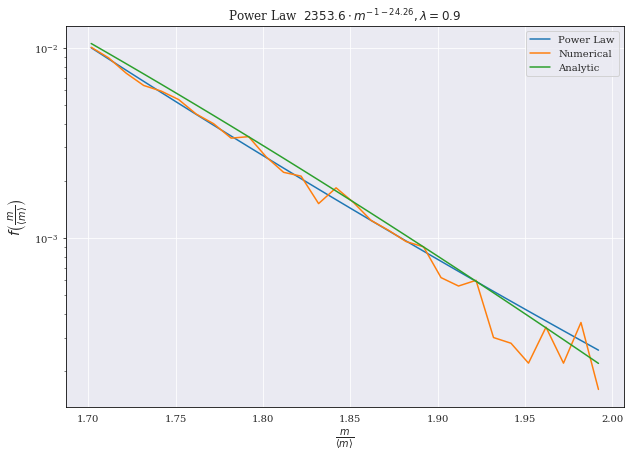

In [126]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[170:200], powerlaw(binX, popt9[0], popt9[1])[170:200], label = 'Power Law')
ax.semilogy(binX[170:200], plotBins9[170:200], label = 'Numerical')
ax.semilogy(binX[170:200], analytic9[170:200], label = 'Analytic')
ax.set_title("Power Law  $%.1f \cdot m^{-1-%.2f}, \lambda = 0.9$" %(popt9[0],popt9[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


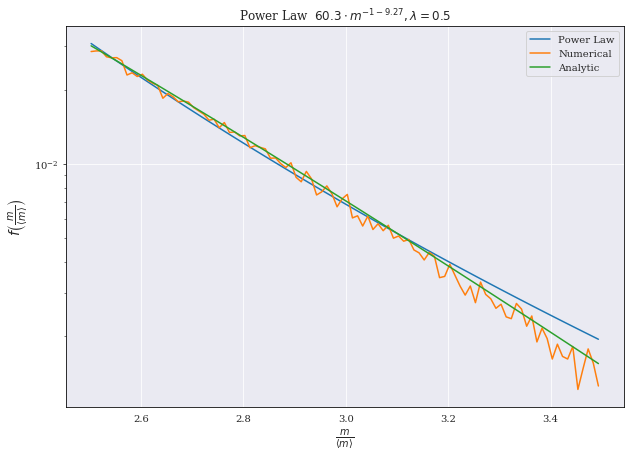

In [133]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[250:350], powerlaw(binX, popt5[0], popt5[1])[250:350], label = 'Power Law')
ax.semilogy(binX[250:350], plotBins5[250:350], label = 'Numerical')
ax.semilogy(binX[250:350], analytic5[250:350], label = 'Analytic')
ax.set_title("Power Law  $%.1f \cdot m^{-1-%.2f}, \lambda = 0.5$" %(popt5[0],popt5[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


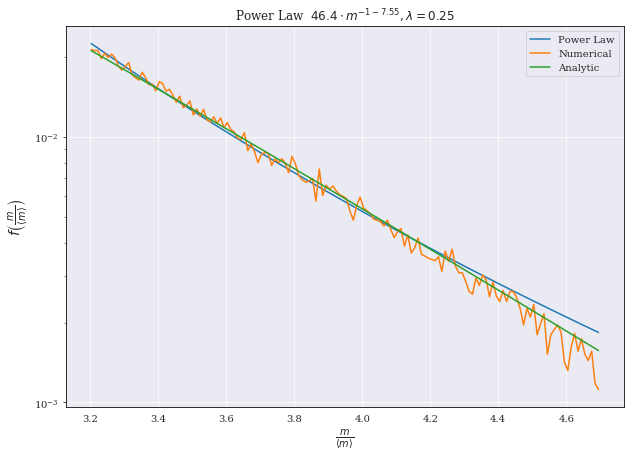

In [134]:
fig, ax = plt.subplots(figsize = (10,7))
ax.semilogy(binX[320:470], powerlaw(binX, popt25[0], popt25[1])[320:470], label = 'Power Law')
ax.semilogy(binX[320:470], plotBins25[320:470], label = 'Numerical')
ax.semilogy(binX[320:470], analytic25[320:470], label = 'Analytic')
ax.set_title("Power Law  $%.1f \cdot m^{-1-%.2f}, \lambda = 0.25$" %(popt25[0],popt25[1]))
ax.set_xlabel(r'$\frac {m} {\langle m \rangle}$', fontsize = 14)
ax.set_ylabel(r'$f \left( \frac {m} {\langle m \rangle} \right)$', fontsize = 14)
ax.legend(loc = 'upper right')
plt.show()

# PART D

In [147]:
var2 = np.load('partd_500_0_2TransVar.npz')
var15 = np.load('partd_500_0_15TransVar.npz')
varPlot2 = var2['trans_variance']
varPlot15 = var15['trans_variance']
varSteps = np.arange(0, varPlot.shape[0])*100

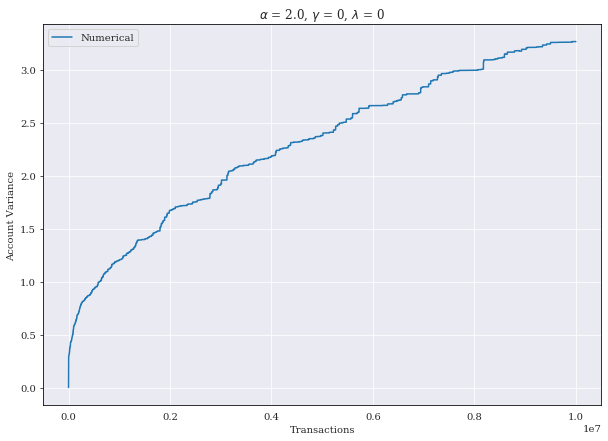

In [148]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(varSteps, varPlot2, label = 'Numerical')
ax.set_title(r'$\alpha$ = 2.0, $\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')
plt.show()

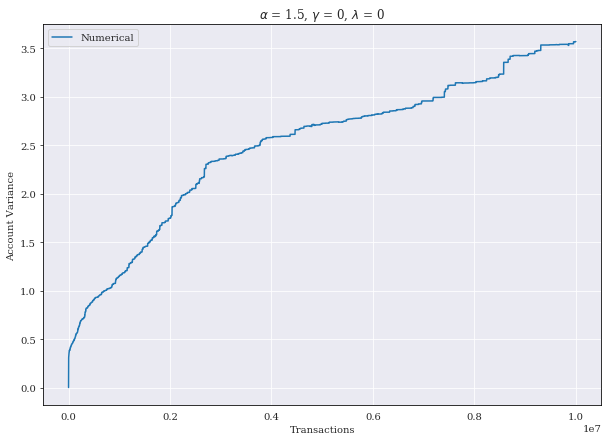

In [152]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(varSteps, varPlot15, label = 'Numerical')
ax.set_title(r'$\alpha$ = 1.5, $\gamma$ = 0, $\lambda$ = 0')
ax.set_xlabel('Transactions')
ax.set_ylabel('Account Variance')
ax.legend(loc = 'upper left')
plt.show()